# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('base_tratada.csv')
df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0


In [3]:
y = df.mau
X = df.drop(columns = 'mau')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
# 2.1)

clf = DecisionTreeClassifier(random_state=100)

In [6]:
# 2.2)

clf = clf.fit(X_train,y_train)

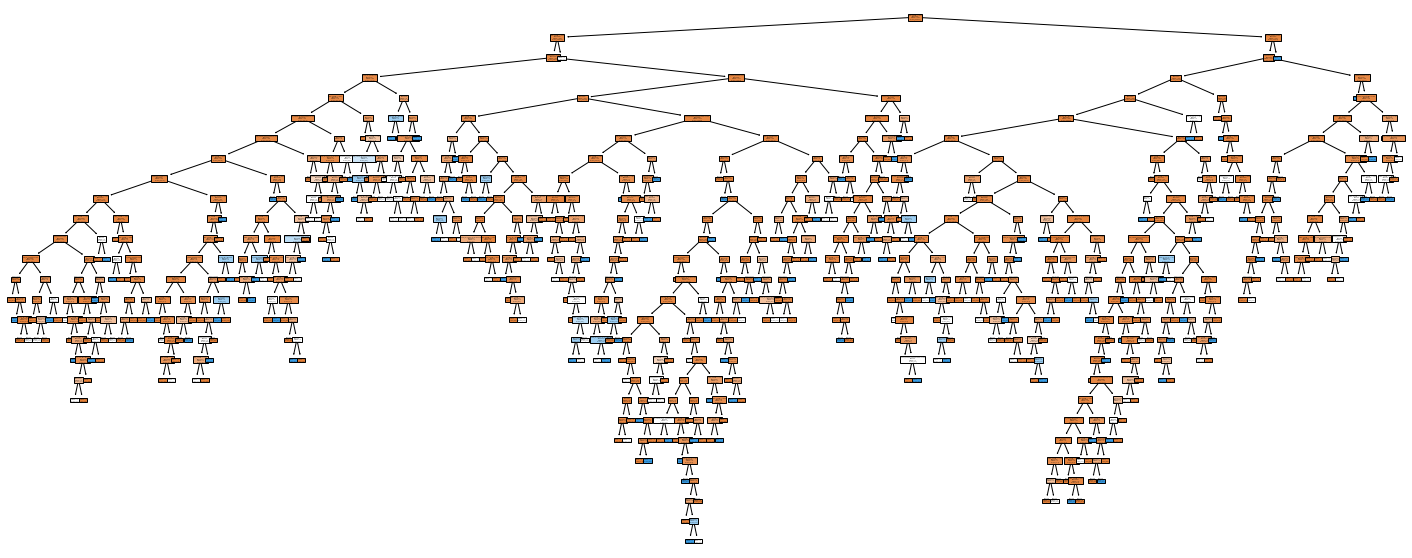

In [7]:
# 2.3)

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          feature_names=X_train.columns);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


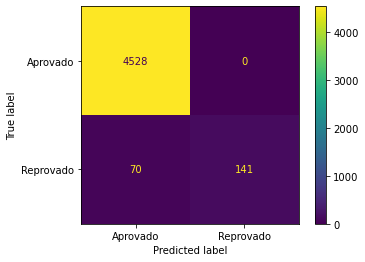

In [8]:
# 2.4)

plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado']);

In [9]:
# 2.5)

predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [10]:
# 3.1)

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


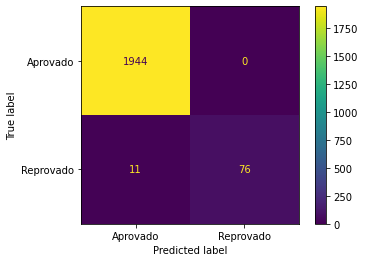

In [11]:
# 3.2)

plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [12]:
# 3.3)

predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9945839487936977

In [13]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

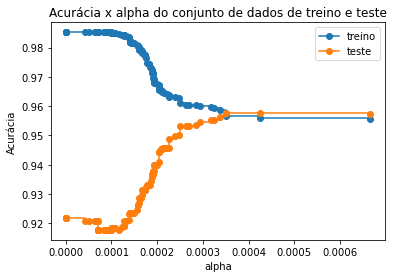

In [15]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
# 3.4)

clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_podada.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

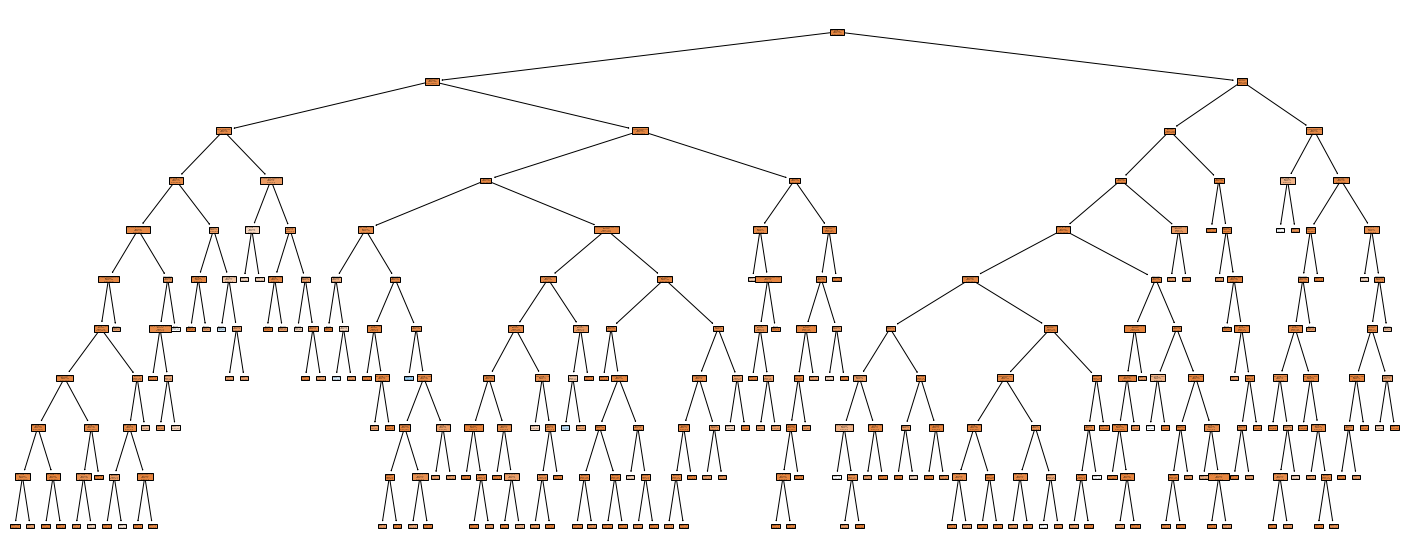

In [17]:
plt.figure(figsize=(25, 10))
plot_tree(clf_podada,
          filled=True,
          feature_names=X_train.columns);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


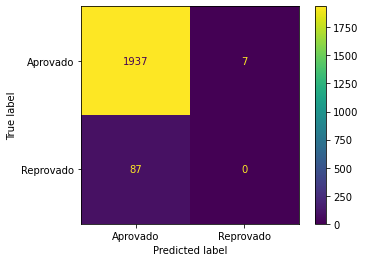

In [18]:
plot_confusion_matrix(clf_podada, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [19]:
predict = clf_podada.predict(X_test)
accuracy_score(y_test, predict)

0.9537173806006893

In [20]:
1937+7+87

2031

In [21]:
proporção_maus = round((7/2031)*100,2)
proporção_maus

0.34

In [22]:
# 3.5)

acur_todos_bons = (1937+7)/2031
acur_todos_bons

0.9571639586410635